In [1]:
import lxml.html
import requests
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
import pandas as pd
from urllib.parse import urljoin
import numpy as np
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from time import sleep
from sklearn.feature_extraction.text import TfidfTransformer
import time

In [2]:
title=pd.read_csv('레몬테라스_유튜브_제목.csv')

In [3]:
comment=pd.read_csv('레몬테라스_유튜브_댓글.csv')

In [4]:
title.drop('Unnamed: 0',axis=1, inplace=True)
comment.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
comment.columns=['댓글']

In [6]:
title.loc[title.내용.isnull(),'내용']=''

In [7]:
comment.loc[comment.댓글.isnull(),'댓글']=''

In [8]:
title['제목']=title['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
title['제목']=title['제목'].str.replace('^ +', "")

title['내용']=title['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
title['내용']=title['내용'].str.replace('^ +', "")

<ipython-input-8-42330fc5d951>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  title['제목']=title['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
<ipython-input-8-42330fc5d951>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  title['제목']=title['제목'].str.replace('^ +', "")
<ipython-input-8-42330fc5d951>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  title['내용']=title['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
<ipython-input-8-42330fc5d951>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  title['내용']=title['내용'].str.replace('^ +', "")


In [9]:
comment['댓글']=comment['댓글'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
comment['댓글']=comment['댓글'].str.replace('^ +', "")

<ipython-input-9-64cf4c83c82b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  comment['댓글']=comment['댓글'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
<ipython-input-9-64cf4c83c82b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  comment['댓글']=comment['댓글'].str.replace('^ +', "")


#### 형태소 분석

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [12]:
from kiwipiepy import Kiwi

In [13]:
import re

In [14]:
kiwi=Kiwi()
kiwi.prepare()

0

In [15]:
stopwords = set(['뭐','호',"거", "것","저","때",'이거','수','데','감','히','후','이','있','하','것','들','그','되','이','보','않','없','나','사람','주','아니','등','같','우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두','말하','알','그러나','받','못하','일'
,'그런','또','문제','더','사회','많','그리고','크','따르','나오','가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','자신','안','어떤','내','경우'
,'명','생각','시간','그녀','다시','이런','앞','보이','번','나','다른','어떻','여자','개','전','들','사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','에','저','분','중','듯','형','식','비','옆','돌','쟁','엄','남','요거','청','쪽','통','존','겹','조','광',])

In [16]:
token_re = re.compile(r'\b\w{2,}\b', re.UNICODE) #양끝단사이에 2글자 이상있는것을 다뽑아라 영어 뿐만아니라 한국어도 가능 1글자짜리 무시하는것

In [17]:
def tokenizer(text):
    words=[]
    result=kiwi.analyze(text)
    for token,pos,start,end in result[0][0]:
        if pos[0] in 'N' and token not in stopwords:
            for word in token_re.findall(token):
                words.append(word)
    return words

# 단어빈도분석

#### 제목 단어빈도

In [18]:
title['제목'][0]

'이상은 아시나요'

In [19]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf2=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm2=tfidf2.fit_transform(title['제목']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [20]:
words2= tfidf2.get_feature_names()

In [21]:
word_count2 = pd.DataFrame({
    '단어': words2,
    '빈도': tdm2.sum(axis=0).flat
})

word_sort2=word_count2.sort_values('빈도',ascending=False).head(30)
word_sort2['단어']=word_sort2.단어.str.split('/').str.get(0)
cleansing_word2=word_sort2

In [22]:
cleansing_word2

,단어,빈도
311,유튜브,52.164563
251,아이,27.616773
417,추천,26.402159
28,게임,22.549475
275,영어,21.881888
76,남편,21.256132
281,오징어,20.359660
308,유투,15.466674
148,방법,14.710604
171,부탁,14.679659


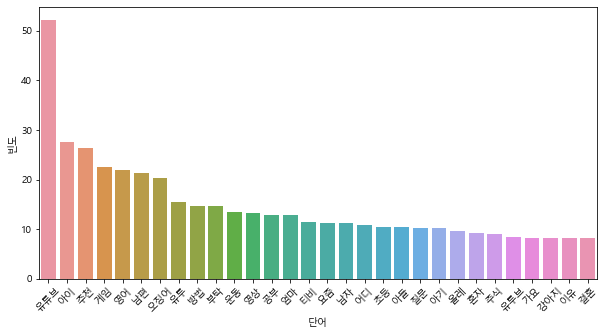

In [106]:
import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())

plt.figure(figsize=(10,5))
sns.barplot(x='단어', y='빈도',data=cleansing_word2)
plt.xticks(rotation=45)
plt.show()

In [23]:
skin_dic2=cleansing_word2.set_index('단어')['빈도'].to_dict()

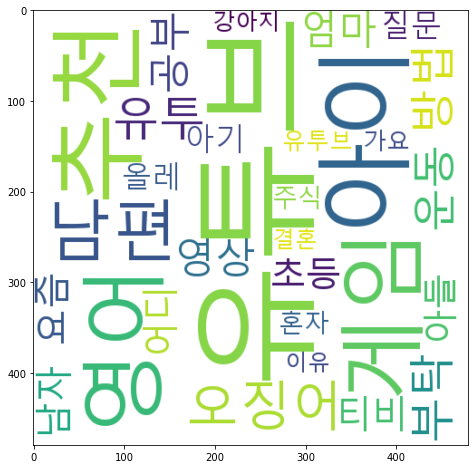

In [24]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(8,8))
wc2 = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc2.generate_from_frequencies(skin_dic2)

plt.imshow(wc2, interpolation='bilinear')

#### 내용 단어빈도

In [25]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf1=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm1=tfidf1.fit_transform(title['내용']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [26]:
words1= tfidf1.get_feature_names()

In [27]:
word_count1 = pd.DataFrame({
    '단어': words1,
    '빈도': tdm1.sum(axis=0).flat
})

word_sort1=word_count1.sort_values('빈도',ascending=False).head(30)
word_sort1['단어']=word_sort1.단어.str.split('/').str.get(0)
cleansing_word1=word_sort1

In [28]:
cleansing_word1

,단어,빈도
313,유튜브,75.636276
252,아이,61.819626
280,영상,40.072285
80,남편,37.769796
297,요즘,31.674465
270,엄마,30.406592
418,추천,30.190287
281,영어,27.147531
180,부탁,26.249560
40,공부,26.083460


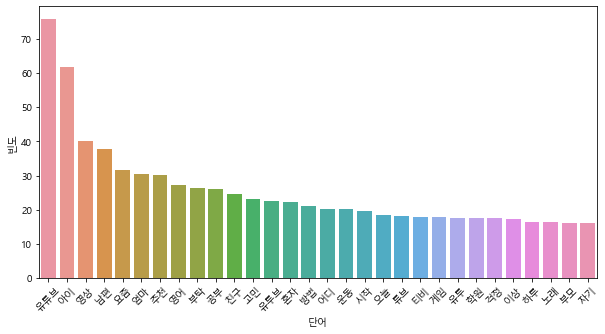

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x='단어', y='빈도',data=cleansing_word1)
plt.xticks(rotation=45)
plt.show()

In [29]:
skin_dic1=cleansing_word1.set_index('단어')['빈도'].to_dict()

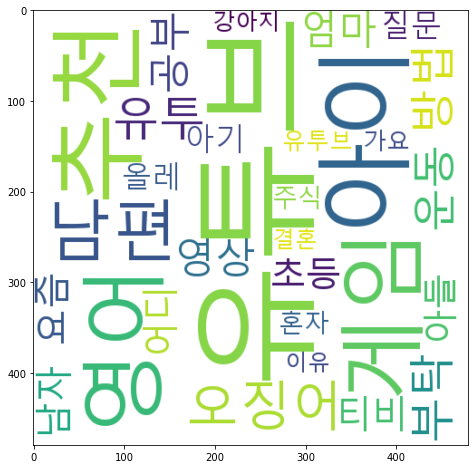

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(8,8))
wc1 = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc1.generate_from_frequencies(skin_dic1)

plt.imshow(wc2, interpolation='bilinear')

#### 댓글 단어빈도

In [31]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf3=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm3=tfidf3.fit_transform(comment['댓글']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [32]:
words3= tfidf3.get_feature_names()

In [33]:
word_count3 = pd.DataFrame({
    '단어': words3,
    '빈도': tdm3.sum(axis=0).flat
})

word_sort3=word_count3.sort_values('빈도',ascending=False).head(30)
word_sort3['단어']=word_sort3.단어.str.split('/').str.get(0)
cleansing_word3=word_sort3

In [34]:
cleansing_word3

,단어,빈도
10,감사,671.659235
256,아이,342.177256
316,유튜브,299.224409
82,남편,259.931672
374,저희,230.988579
272,엄마,220.377415
301,요즘,151.885518
56,그거,146.264290
172,부모,145.953524
305,운동,145.479465


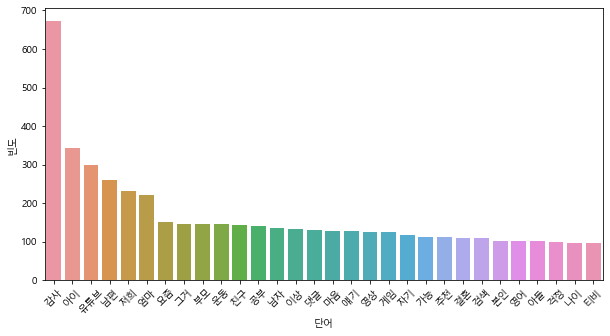

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(x='단어', y='빈도',data=cleansing_word3)
plt.xticks(rotation=45)
plt.show()

In [35]:
skin_dic3=cleansing_word3.set_index('단어')[ '빈도'].to_dict()

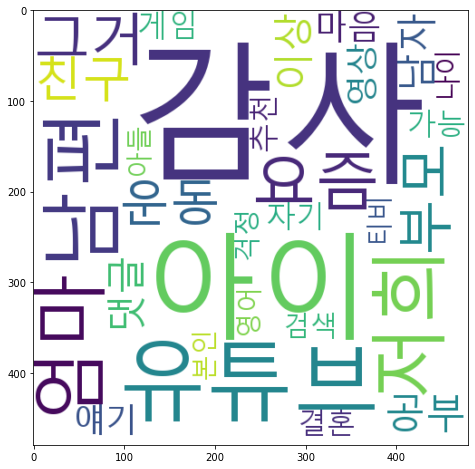

In [36]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(8,8))
wc3 = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc3.generate_from_frequencies(skin_dic3)

plt.imshow(wc3, interpolation='bilinear')

##  주제분석

In [49]:
from gensim.models import CoherenceModel
from gensim import corpora, models
import gensim
from gensim.corpora.dictionary import Dictionary
from sklearn.model_selection import train_test_split
from gensim.models.ldamodel import LdaModel


#LDA에 어떤 경고를 무시
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [90]:
docs = []
for text in comment.댓글:
    doc = tokenizer(text)
    docs.append(doc)

In [91]:
dic = Dictionary(docs)

In [92]:
dic.filter_extremes(no_below=10,no_above=1)#엔 모스트 프리퀀트는 가장 자주 나오는 단어 기준으로, 익스트림은 극단적인단어, no_beolow = 일부 문서에서 사용된걸 제외 no_above= 너무 흔하게 나온 단어들은 제외 
                                            #10개이하의 문서 자르고 90퍼센트 이상의 문서에서 나오는것 잘라내기

In [93]:
corpus=[]
for doc in docs:
    bow=dic.doc2bow(doc) #bag of words
    corpus.append(bow)

In [94]:
train_corpus, valid_corpus = train_test_split(corpus, test_size=0.1, random_state=5432)

In [95]:
coherences=[]
perplexities=[]
dayang=[]
warnings.filterwarnings('ignore')

for i in range(2,50,3):
    lda4 = LdaModel(corpus, id2word=dic, num_topics=i)
    print('토픽 갯수 : {}개'.format(i))
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=corpus,texts=docs,dictionary=dic,coherence='c_v')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus))
    perplexities.append(lda4.log_perplexity(corpus))
    topn=25
    top_words=set()
    for topic in range(lda4.num_topics):
        for word, prob in lda4.show_topic(topic,topn=topn):
            top_words.add(word)
    summary=len(top_words)/(25*i)
    dayang.append(summary)
    print("주제 다양도:",summary,'\n\n')
    

토픽 갯수 : 2개
Coherence 0.32420141388543944
Perplexity:  -6.900206340876995
주제 다양도: 0.98 


토픽 갯수 : 5개
Coherence 0.3554274898624207
Perplexity:  -7.082579474089198
주제 다양도: 0.896 


토픽 갯수 : 8개
Coherence 0.36622124976702963
Perplexity:  -7.1319671432656095
주제 다양도: 0.865 


토픽 갯수 : 11개
Coherence 0.3898263564481485
Perplexity:  -7.23195692337453
주제 다양도: 0.9090909090909091 


토픽 갯수 : 14개
Coherence 0.40149577815002685
Perplexity:  -8.560481475039229
주제 다양도: 0.9028571428571428 


토픽 갯수 : 17개
Coherence 0.4417417507910909
Perplexity:  -9.263623281022186
주제 다양도: 0.8964705882352941 


토픽 갯수 : 20개
Coherence 0.4305397407472261
Perplexity:  -9.64720753147062
주제 다양도: 0.896 


토픽 갯수 : 23개
Coherence 0.43321589544619105
Perplexity:  -10.021703800400605
주제 다양도: 0.8991304347826087 


토픽 갯수 : 26개
Coherence 0.47793558573721995
Perplexity:  -10.46073171865363
주제 다양도: 0.9076923076923077 


토픽 갯수 : 29개
Coherence 0.468127707623905
Perplexity:  -10.931613532599673
주제 다양도: 0.88 


토픽 갯수 : 32개
Coherence 0.47983279887

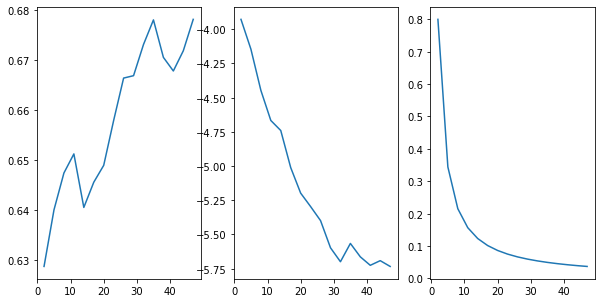

In [82]:
# 제목 토픽갯수 11가 최적값
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
x=range(2,50,3)
ax1.plot(x,coherences)
ax2.plot(x,perplexities)
ax3.plot(x,dayang)

plt.show()

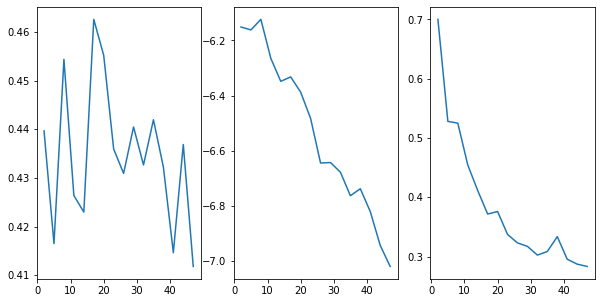

In [67]:
# 내용 토픽갯수 17가 최적값
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
x=range(2,50,3)
ax1.plot(x,coherences)
ax2.plot(x,perplexities)
ax3.plot(x,dayang)

plt.show()

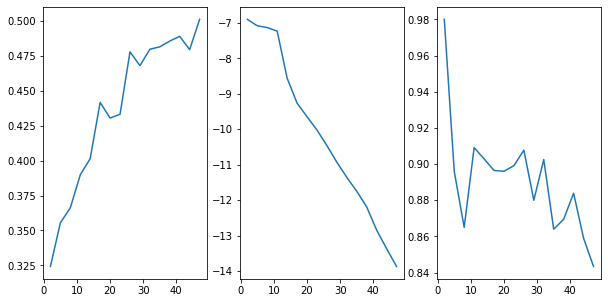

In [96]:
# 댓글 토픽갯수 17가 최적값
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
x=range(2,50,3)
ax1.plot(x,coherences)
ax2.plot(x,perplexities)
ax3.plot(x,dayang)

plt.show()

# 모델링

In [97]:
#6-4번 코드 
model = LdaModel(
    corpus=train_corpus,
    id2word=dic,#번호하고 단어 짝지은것 
    num_topics=17,passes=10,
    random_state=1234)

In [98]:
loss = model.log_perplexity(valid_corpus)

In [99]:
old_loss=-np.inf
while loss > old_loss + 0.1:
    model.update(train_corpus)
    old_loss = loss
    loss = model.log_perplexity(valid_corpus)
    print(loss)

-9.766295004403432


In [100]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [101]:
p = pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=False)

In [102]:
s=pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=True)

## 제목 주제분석

In [89]:
pyLDAvis.display(s)#토픽 번호가 하나씩 밀려있음 클릭해서 보면 관련된, 0으로지정해서보면 탑 30 샐리언트
#슬라이드 투 어드저스트 메트릭스 어떤 토픽하고 어떤단어가 관련된 정도를 계산할때 두가지 지표 사용 
# 1이 끝으로 가있으면 그 토픽에서 가장 많이나오는 단어 기준으로 계산한것  절대적
# 0으로 하면 평소에 그 단어가 나오는 비율대비해서 이토픽에선 얼마나 자주나오나 계산 상대적
# 보통 0.6정도 권장

## 내용 주제분석

In [74]:
pyLDAvis.display(s)#토픽 번호가 하나씩 밀려있음 클릭해서 보면 관련된, 0으로지정해서보면 탑 30 샐리언트
#슬라이드 투 어드저스트 메트릭스 어떤 토픽하고 어떤단어가 관련된 정도를 계산할때 두가지 지표 사용 
# 1이 끝으로 가있으면 그 토픽에서 가장 많이나오는 단어 기준으로 계산한것  절대적
# 0으로 하면 평소에 그 단어가 나오는 비율대비해서 이토픽에선 얼마나 자주나오나 계산 상대적
# 보통 0.6정도 권장

## 댓글 주제분석

In [103]:
pyLDAvis.display(s)#토픽 번호가 하나씩 밀려있음 클릭해서 보면 관련된, 0으로지정해서보면 탑 30 샐리언트
#슬라이드 투 어드저스트 메트릭스 어떤 토픽하고 어떤단어가 관련된 정도를 계산할때 두가지 지표 사용 
# 1이 끝으로 가있으면 그 토픽에서 가장 많이나오는 단어 기준으로 계산한것  절대적
# 0으로 하면 평소에 그 단어가 나오는 비율대비해서 이토픽에선 얼마나 자주나오나 계산 상대적
# 보통 0.6정도 권장